In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import os
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn import metrics
import scipy.sparse

# 1. Use the same dataset of movies as HW4 and the same queries.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/TextMining
%ls *.csv

/content/drive/MyDrive/TextMining
wiki_movie_plots_deduped.csv


In [ ]:
dir_file = os.getcwd() # returns path to current directory
files_dir = os.listdir(dir_file)  # list of files in current directory

csv_files = [f for f in files_dir if f.endswith('csv')]
print(csv_files)
movie_file = csv_files[0]

movie_df = pd.read_csv(movie_file)
print(movie_df.columns)  # the columns
print(movie_df.shape)

['wiki_movie_plots_deduped.csv']
Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot'],
      dtype='object')
(34886, 8)


#2.Read about sentence embedding models at: https://www.sbert.net/ and at https://www.marqo.ai/course/introduction-to-sentence-transformers

#3 Read about the sentence_transformers model methods and parameters at: https://www.sbert.net/docs/package_reference/sentence_transformer/SentenceTransformer.html#id1

#4.Interesting comparison between Huggingface sentence embedding and sentence_transformers: https://nehaytamore.medium.com/analysing-time-complexity-of-sentence-transformers-model-encode-b54733be2613

#5.Pick two sentence embedding models from the list at: https://www.sbert.net/docs/sentence_transformer/pretrained_models.html. Pick them based on their performance, size, context length, and embedding size.









## Models


*   all-mpnet-base-v2
*   multi-qa-mpnet-base-dot-v1



##Imports

In [ ]:
from sentence_transformers import SentenceTransformer


model_1 = SentenceTransformer("all-mpnet-base-v2")
model_2 = SentenceTransformer("multi-qa-mpnet-base-dot-v1")

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/8.71k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Find the maximum sentence length for each model: use get_max_seq_length()

In [ ]:
print(f"Max sequence length for all-mpnet-base-v2: {model_1.get_max_seq_length()}")
print(f"Max sequence length for multi-qa-mpnet-base-dot-v1: {model_2.get_max_seq_length()}")

Max sequence length for all-mpnet-base-v2: 384
Max sequence length for multi-qa-mpnet-base-dot-v1: 512


## Find the embedding size for each model: get_sentence_embedding_dimension()

In [ ]:
print(f"Embedding size for all-mpnet-base-v2: {model_1.get_sentence_embedding_dimension()}")
print(f"Embedding for multi-qa-mpnet-base-dot-v1: {model_2.get_sentence_embedding_dimension()}")

Embedding size for all-mpnet-base-v2: 768
Embedding for multi-qa-mpnet-base-dot-v1: 768


### Learn how to set Google Colab Notebook to use GPU: https://www.geeksforgeeks.org/how-to-use-gpu-in-google-colab/

In [ ]:
import torch
!nvidia-smi

Sun Nov 10 19:34:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0              25W /  70W |   1025MiB / 15360MiB |      5%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Learn how to load the model on the GPU: import torch DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()

## Check you are using the GPU: torch.cuda.get_device_name(0)

In [ ]:
torch.cuda.get_device_name(0)

'Tesla T4'

## Load your model on GPU. For example: model = SentenceTransformer("all-mpnet-base-v2", device="cuda")

In [ ]:
model_1 = SentenceTransformer("all-mpnet-base-v2", device="cuda")
model_2 = SentenceTransformer("multi-qa-mpnet-base-dot-v1", device="cuda")

## Check the configuration of your model: model

In [ ]:
print(model_1)
print(model_2)

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)
SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': True, 'pooling_mode_mean_tokens': False, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)


#6 Pick a few movie plots to test the embeddings






# Embed the plots (use encode() to return sentence embeddings) - the text is automatically truncated to fit in the max sentence length. Compute the length of the truncated, embedded text divided by the total length (in characters not words).

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Select a few movie plots for testing (e.g., first 5)
sample_plots = movie_df['Plot'].head(5).tolist()

# Encode the plots with each model and compute truncated-to-total length ratio
embeddings_1 = []
truncated_ratios_1 = []

for plot in sample_plots:
    # Embed with truncation
    embedding = model_1.encode(plot, truncate=True)
    embeddings_1.append(embedding)

    # Calculate truncated-to-total length ratio
    truncated_length = len(model_1.tokenizer.tokenize(plot))
    total_length = len(plot)
    truncated_ratios_1.append(truncated_length / total_length)

# Repeat for the second model
embeddings_2 = []
truncated_ratios_2 = []

for plot in sample_plots:
    embedding = model_2.encode(plot, truncate=True)
    embeddings_2.append(embedding)
    truncated_length = len(model_2.tokenizer.tokenize(plot))
    truncated_ratios_2.append(truncated_length / total_length)

# Set the similarity function to 'cosine' or 'dot' (see sample code)

In [ ]:
# compute similarity between embeddings
# type of similarity functions and how to set them: "cosine", "dot", "euclidean", "manhattan", default is cosine
# get current similarity function
# similarity_fn_name, similarity
print(model_1.similarity_fn_name)
print(model_2.similarity_fn_name)
# set similarity function
model_1.similarity_fn_name = 'cosine' # "cosine", "dot", "euclidean", "manhattan'
model_2.similarity_fn_name = 'cosine' # "cosine", "dot", "euclidean", "manhattan'
print(model_1.similarity_fn_name)
print(model_2.similarity_fn_name)

None
dot
cosine
cosine


# Compute the similarity between the movie plots you selected.

In [ ]:
model_1.similarity(embeddings_1, embeddings_1)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/util.py:44: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  a = torch.tensor(a)


tensor([[1.0000, 0.2587, 0.3008, 0.2724, 0.2421],
        [0.2587, 1.0000, 0.3482, 0.3552, 0.2036],
        [0.3008, 0.3482, 1.0000, 0.6515, 0.2686],
        [0.2724, 0.3552, 0.6515, 1.0000, 0.2924],
        [0.2421, 0.2036, 0.2686, 0.2924, 1.0000]])

In [ ]:
model_2.similarity(embeddings_2, embeddings_2)

tensor([[1.0000, 0.4365, 0.3771, 0.3711, 0.2835],
        [0.4365, 1.0000, 0.4334, 0.4523, 0.3180],
        [0.3771, 0.4334, 1.0000, 0.6336, 0.2792],
        [0.3711, 0.4523, 0.6336, 1.0000, 0.3739],
        [0.2835, 0.3180, 0.2792, 0.3739, 1.0000]])

#7.Embed all movie plots




## Compute and display the average truncation rate (\# char truncated plot/\# char whole plot) for all movies in your dataset.

In [ ]:
truncation_rates = []

for plot in movie_df['Plot']:
    # Calculate truncated-to-total length ratio
    truncated_length = len(model_1.tokenizer.tokenize(plot))
    total_length = len(plot)
    truncation_rate = (total_length - truncated_length) / total_length if total_length > 0 else 0
    truncation_rates.append(truncation_rate)
avg_truncation_rate = np.mean(truncation_rates)
print(f"Average truncation rate: {avg_truncation_rate}")

Token indices sequence length is longer than the specified maximum sequence length for this model (758 > 384). Running this sequence through the model will result in indexing errors


Average truncation rate: 0.7754689248123857


# Store the embeddings in a file (see sentence_transformers.ipynb)

In [ ]:
# save the embeddings
np.save('movie_embed_1',embeddings_1, allow_pickle = False)
np.save('movie_embed_2',embeddings_2, allow_pickle = False)

#8. For each query from HW 4:









In [ ]:
queries = [
    "Inspiring Pirate adventure",
    "depressing ghost story",
    "Based on a true story"
]

model1_name = "all-mpnet-base-v2"
model2_name = "multi-qa-mpnet-base-dot-v1"

## Compute the cosine similarity between the query embedding and all movie plot embeddings

In [ ]:
def top_n(query,model,similarity_scores,n):
   # Ensure similarity scores are a 1D array
    similarity_scores = similarity_scores.flatten()

    # Find the top n most similar plots
    top_n_indices = np.argsort(similarity_scores)[-n:][::-1]  # Sort and get indices of top n scores

    # Display top n similar movies
    top_n_movies = movie_df.iloc[top_n_indices][['Title', 'Plot']].copy()
    top_n_movies['Similarity Score'] = similarity_scores[top_n_indices].tolist()

    print(f"Top {n} similar movies to the query {query},with model {model}:")
    print(top_n_movies)

## Embed the query.

In [ ]:
plot_embeddings_1 =[]
plot_embeddings_2 =[]
for plot in movie_df['Plot']:
    # Embed with truncation
    embedding = model_1.encode(plot, truncate=True)
    plot_embeddings_1.append(embedding)
for plot in movie_df['Plot']:
    # Embed with truncation
    embedding = model_2.encode(plot, truncate=True)
    plot_embeddings_2.append(embedding)

## Find the top 7 most similar movies, display their plot.

In [ ]:
for query in queries:
    # Encode the query
    query_embedding = model_1.encode(query, truncate=True)
    # Compute similarity with all plot embeddings
    similarity_scores_1 = model_1.similarity(np.array([query_embedding]), plot_embeddings_1)
    similarity_scores_1 = similarity_scores_1.numpy().flatten()  # Convert to 1D NumPy array

    # Display top 7 similar movies
    top_n(query,model1_name,similarity_scores_1, 7)

Top 7 similar movies to the query Inspiring Pirate adventure,with model all-mpnet-base-v2:
                               Title  \
8246               The King's Pirate   
19717         The Devil-Ship Pirates   
11544                Treasure Island   
20170       Ghost in the Noonday Sun   
8868                 Treasure Island   
5794   All the Brothers Were Valiant   
5263                 Treasure Island   

                                                    Plot  Similarity Score  
8246   A British naval officer volunteers for a dange...          0.653719  
19717  A pirate ship, involved in 1588 battles on the...          0.568349  
11544  Jim Hawkins (Christian Bale) discovers a treas...          0.560614  
20170  Pirate captain Ras Mohammed (Peter Boyle), acc...          0.549750  
8868   Enchanted by the idea of locating treasure bur...          0.547437  
5794   Seafaring saga of two brothers and the woman t...          0.546153  
5263   In the West Coast of England in 1765, a yo

In [ ]:
print(f"Top 3 Precision for \"Inspiring Pirate adventure\"")
print(f"Precision Value {3/3}\n")

print(f"Top 5 Precision for \"Inspiring Pirate adventure\"")
print(f"Precision Value {5/5}\n")

print(f"Top 7 Precision for \"Inspiring Pirate adventure\"")
print(f"Precision Value {7/7}\n")

In [ ]:
print(f"Top 3 Similarity for \"depressing ghost story\"")
print(f"Precision Value {2/3}\n")

print(f"Top 5 Similarity for \"depressing ghost story\"")
print(f"Precision Value {4/5}\n")

print(f"Top 7 Similarity for \"depressing ghost story\"")
print(f"Precision Value {6/7}\n")

In [ ]:
print(f"Top 3 Similarity for \"Based on a true story\"")
print(f"Precision Value {3/3}\n")

print(f"Top 5 Similarity for \"Based on a true story\"")
print(f"Precision Value {5/5}\n")

print(f"Top 7 Similarity for \"Based on a true story\"")
print(f"Precision Value {7/7}\n")

In [ ]:
# Compute similarity scores for each query with model 2
for query in queries:
    # Encode the query
    query_embedding = model_2.encode(query, truncate=True)
    # Compute similarity with all plot embeddings
    similarity_scores_2 = model_2.similarity(np.array([query_embedding]), plot_embeddings_2)
    similarity_scores_2 = similarity_scores_2.numpy().flatten()  # Convert to 1D NumPy array

    # Display top 7 similar movies
    top_n(query,model2_name,similarity_scores_2, 7)

Top 7 similar movies to the query Inspiring Pirate adventure,with model multi-qa-mpnet-base-dot-v1:
                                                Title  \
8246                                The King's Pirate   
19096                                   Laughing Anne   
580                                  The Black Pirate   
156                                        All Aboard   
18441                      The Mutiny of the Elsinore   
33494  Detective Conan: Jolly Roger in the Deep Azure   
19980                         Lock Up Your Daughters!   

                                                    Plot  Similarity Score  
8246   A British naval officer volunteers for a dange...          0.633812  
19096  A woman runs off to the South Seas with a priz...          0.607132  
580    The film begins with the looting of a ship alr...          0.580809  
156    A father takes his daughter on a trip to Bermu...          0.573591  
18441  Following a mutiny on a ship against a brutal ...  

## Compute precision in top 3, top 5, and top 7.

In [ ]:
print(f"Top 3 Precision for \"Inspiring Pirate adventure\"")
print(f"Precision Value {2/3}\n")

print(f"Top 5 Precision for \"Inspiring Pirate adventure\"")
print(f"Precision Value {3/5}\n")

print(f"Top 7 Precision for \"Inspiring Pirate adventure\"")
print(f"Precision Value {4/7}\n")

In [ ]:
print(f"Top 3 Similarity for \"depressing ghost story\"")
print(f"Precision Value {2/3}\n")

print(f"Top 5 Similarity for \"depressing ghost story\"")
print(f"Precision Value {4/5}\n")

print(f"Top 7 Similarity for \"depressing ghost story\"")
print(f"Precision Value {6/7}\n")

In [ ]:
print(f"Top 3 Similarity for \"Based on a true story\"")
print(f"Precision Value {1/3}\n")

print(f"Top 5 Similarity for \"Based on a true story\"")
print(f"Precision Value {1/5}\n")

print(f"Top 7 Similarity for \"Based on a true story\"")
print(f"Precision Value {1/7}\n")

## Repeat for dot product similarity. Comment if you see any difference in results. It seems that cosine similarity favors shorter plots.

In [ ]:
print(model_1.similarity_fn_name)
print(model_2.similarity_fn_name)
# set similarity function
model_1.similarity_fn_name = 'dot' #
model_2.similarity_fn_name = 'dot' #
print(model_1.similarity_fn_name)
print(model_2.similarity_fn_name)

cosine
cosine
dot
dot


In [ ]:
for query in queries:
    # Encode the query
    query_embedding = model_1.encode(query, truncate=True)
    # Compute similarity with all plot embeddings
    similarity_scores_1 = model_1.similarity(np.array([query_embedding]), plot_embeddings_1)
    similarity_scores_1 = similarity_scores_1.numpy().flatten()  # Convert to 1D NumPy array

    # Display top 7 similar movies
    top_n(query,model1_name,similarity_scores_1, 7)

Top 7 similar movies to the query Inspiring Pirate adventure,with model all-mpnet-base-v2:
                               Title  \
8246               The King's Pirate   
19717         The Devil-Ship Pirates   
11544                Treasure Island   
20170       Ghost in the Noonday Sun   
8868                 Treasure Island   
5794   All the Brothers Were Valiant   
5263                 Treasure Island   

                                                    Plot  Similarity Score  
8246   A British naval officer volunteers for a dange...          0.653719  
19717  A pirate ship, involved in 1588 battles on the...          0.568349  
11544  Jim Hawkins (Christian Bale) discovers a treas...          0.560614  
20170  Pirate captain Ras Mohammed (Peter Boyle), acc...          0.549750  
8868   Enchanted by the idea of locating treasure bur...          0.547437  
5794   Seafaring saga of two brothers and the woman t...          0.546153  
5263   In the West Coast of England in 1765, a yo

In [ ]:
# Compute similarity scores for each query with model 2
for query in queries:
    # Encode the query
    query_embedding = model_2.encode(query, truncate=True)
    # Compute similarity with all plot embeddings
    similarity_scores_2 = model_2.similarity(np.array([query_embedding]), plot_embeddings_2)
    similarity_scores_2 = similarity_scores_2.numpy().flatten()  # Convert to 1D NumPy array

    # Display top 7 similar movies
    top_n(query,model2_name,similarity_scores_2, 7)

Top 7 similar movies to the query Inspiring Pirate adventure,with model multi-qa-mpnet-base-dot-v1:
                        Title  \
8246        The King's Pirate   
17514        The Pirate Movie   
1080        Captain Applejack   
580          The Black Pirate   
19096           Laughing Anne   
156                All Aboard   
19717  The Devil-Ship Pirates   

                                                    Plot  Similarity Score  
8246   A British naval officer volunteers for a dange...         25.329140  
17514  Mabel Stanley (Kristy McNichol) is an introver...         23.389690  
1080   Ambrose Applejohn lives in an extravagant old ...         23.218109  
580    The film begins with the looting of a ship alr...         23.041008  
19096  A woman runs off to the South Seas with a priz...         23.008400  
156    A father takes his daughter on a trip to Bermu...         22.924042  
19717  A pirate ship, involved in 1588 battles on the...         22.869717  
Top 7 similar movie

#Implement information retrieval using reduced tf-idf dimensionality reduction (see movie_feedback_retrieval.ipynb:

## 1. Compute the tf-idf matrix - look at the sample code.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd

# Extract the 'Plot' column
plots = movie_df['Plot'].fillna('')  # Replace NaNs with empty strings

# Step 1: CountVectorizer to create the term-document matrix
count_vectorizer = CountVectorizer(max_features=5000)  # Limit to top 5000 terms to manage memory
term_doc_matrix = count_vectorizer.fit_transform(plots)

# Step 2: TfidfTransformer to compute the TF-IDF matrix
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(term_doc_matrix)


In [ ]:
# Specify the portion you want to print with a larger number of columns
rows_to_display = 5
columns_to_display = 50  # Increase the column range to capture non-zero values

# Convert the portion to a dense array for easy viewing
tfidf_sample = tfidf_matrix[:rows_to_display, :columns_to_display].toarray()

# Print the sample with column headers
print("TF-IDF Matrix Sample (first 5 rows, first 50 columns):")
print(tfidf_sample)



TF-IDF Matrix Sample (first 5 rows, first 50 columns):
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.     

## 2. Apply the SVD transform - choose 200, then repeat with 500 number of reduced dimensions.

In [ ]:
from sklearn.decomposition import TruncatedSVD

# First SVD transformation with 200 components
svd_200 = TruncatedSVD(n_components=200)
tfidf_reduced_200 = svd_200.fit_transform(tfidf_matrix)

print("SVD with 200 components:")
print(tfidf_reduced_200)

# Second SVD transformation with 500 components
svd_500 = TruncatedSVD(n_components=500)
tfidf_reduced_500 = svd_500.fit_transform(tfidf_matrix)

print("\nSVD with 500 components:")
print(tfidf_reduced_500)


SVD with 200 components:
[[ 0.26988057  0.0681006   0.00071842 ... -0.00678866 -0.01443259
  -0.00307659]
 [ 0.26691444  0.08019771 -0.05894379 ...  0.0037668  -0.01106626
  -0.01384289]
 [ 0.29132028  0.16418655 -0.11294011 ... -0.01243868 -0.01815242
  -0.00890453]
 ...
 [ 0.23586694 -0.13937021  0.1060007  ... -0.00373396  0.00556437
  -0.01439338]
 [ 0.35661104  0.00610065 -0.0597965  ... -0.00130121 -0.02128654
   0.00350571]
 [ 0.3237017   0.01807557  0.04369302 ... -0.00809606  0.00291891
  -0.0029794 ]]

SVD with 500 components:
[[ 0.26988057  0.0681006   0.00071843 ... -0.01200668 -0.00559938
  -0.01136134]
 [ 0.26691444  0.08019771 -0.05894379 ...  0.00878784  0.00334742
   0.06384552]
 [ 0.29132028  0.16418655 -0.1129401  ...  0.00225574 -0.01673808
   0.00754279]
 ...
 [ 0.23586694 -0.13937021  0.1060007  ... -0.0323792   0.00130545
  -0.00745993]
 [ 0.35661104  0.00610065 -0.05979651 ...  0.0148603   0.0017931
  -0.01223286]
 [ 0.3237017   0.01807557  0.04369298 ...  0.003

## 3. Save the transform in a file. Use the np.save as in the sentence_transformers.ipynb file.

##4.For each query:







### Query 1

#### Compute the tf query vector, then apply the dimensionality reduction - see sample code.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Compute the TF query vector
query_vector1 = count_vectorizer.transform([queries[0]])
query_vector2 = count_vectorizer.transform([queries[1]])
query_vector3 = count_vectorizer.transform([queries[2]])

In [ ]:
# Step 2: Apply dimensionality reduction with SVD
# Reduce the query vector to 200 and 500 dimensions respectively
query1_reduced_200 = svd_200.transform(query_vector1)
query1_reduced_500 = svd_500.transform(query_vector1)

query2_reduced_200 = svd_200.transform(query_vector2)
query2_reduced_500 = svd_500.transform(query_vector2)

query3_reduced_200 = svd_200.transform(query_vector3)
query3_reduced_500 = svd_500.transform(query_vector3)

#### Compute the cosine and then dot product between the reduced query vector and the vectors of each movie plot (matrix computation).

In [ ]:
# Step 3: Compute cosine similarity and dot product
# Cosine similarity with 200 dimensions
cosine1_sim_200 = cosine_similarity(query1_reduced_200, tfidf_reduced_200)[0]
# Dot product with 200 dimensions
dot1_product_200 = np.dot(tfidf_reduced_200, query1_reduced_200.T).flatten()

# Cosine similarity with 500 dimensions
cosine1_sim_500 = cosine_similarity(query1_reduced_500, tfidf_reduced_500)[0]
# Dot product with 500 dimensions
dot1_product_500 = np.dot(tfidf_reduced_500, query1_reduced_500.T).flatten()


In [ ]:
# Step 3: Compute cosine similarity and dot product
# Cosine similarity with 200 dimensions
cosine2_sim_200 = cosine_similarity(query2_reduced_200, tfidf_reduced_200)[0]
# Dot product with 200 dimensions
dot2_product_200 = np.dot(tfidf_reduced_200, query2_reduced_200.T).flatten()

# Cosine similarity with 500 dimensions
cosine2_sim_500 = cosine_similarity(query2_reduced_500, tfidf_reduced_500)[0]
# Dot product with 500 dimensions
dot2_product_500 = np.dot(tfidf_reduced_500, query2_reduced_500.T).flatten()

In [ ]:
# Step 3: Compute cosine similarity and dot product
# Cosine similarity with 200 dimensions
cosine3_sim_200 = cosine_similarity(query3_reduced_200, tfidf_reduced_200)[0]
# Dot product with 200 dimensions
dot3_product_200 = np.dot(tfidf_reduced_200, query3_reduced_200.T).flatten()

# Cosine similarity with 500 dimensions
cosine3_sim_500 = cosine_similarity(query3_reduced_500, tfidf_reduced_500)[0]
# Dot product with 500 dimensions
dot3_product_500 = np.dot(tfidf_reduced_500, query3_reduced_500.T).flatten()

#### Look at the plot of the top 7 most similar movies.

In [ ]:
# Step 4: Identify and plot the top 7 most similar movies
# Define a function to plot the results
def plot_top_similarities(similarities, title):
    top_indices = np.argsort(similarities)[-7:][::-1]  # Top 7 indices, sorted descending
    top_titles = movie_df.iloc[top_indices]['Title']  # Fetch titles based on indices
    top_scores = similarities[top_indices]

    plt.figure(figsize=(10, 6))
    plt.barh(top_titles, top_scores, color='skyblue')
    plt.xlabel("Similarity Score")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

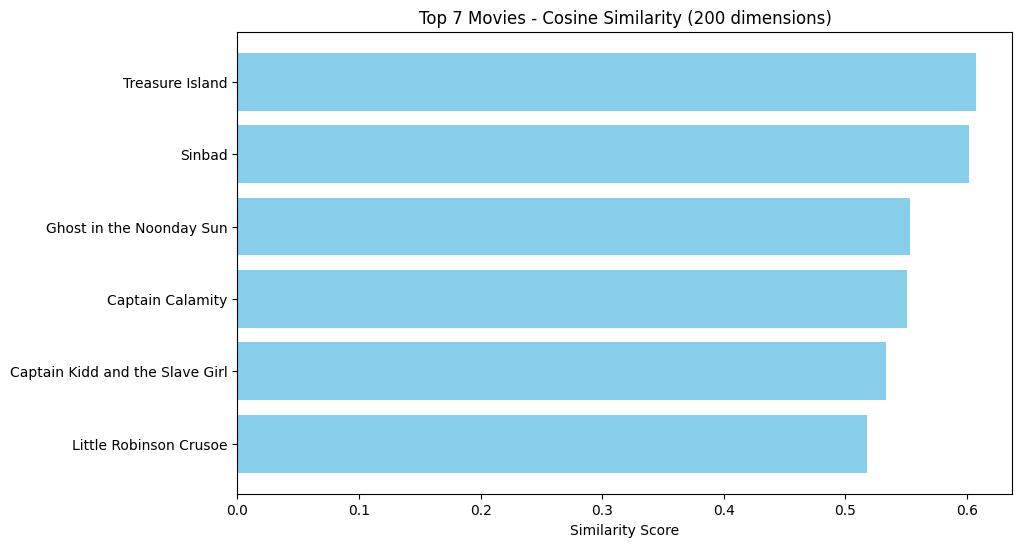

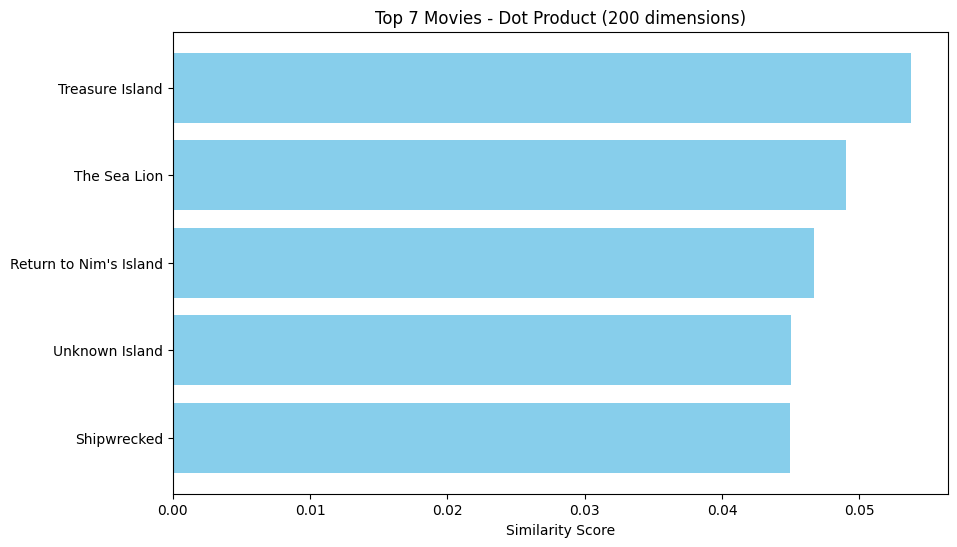

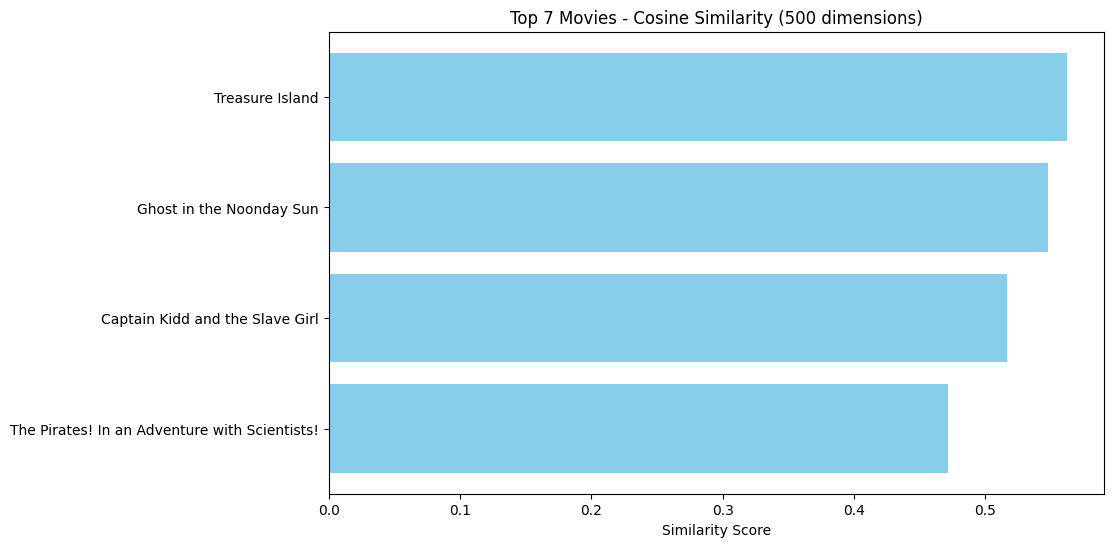

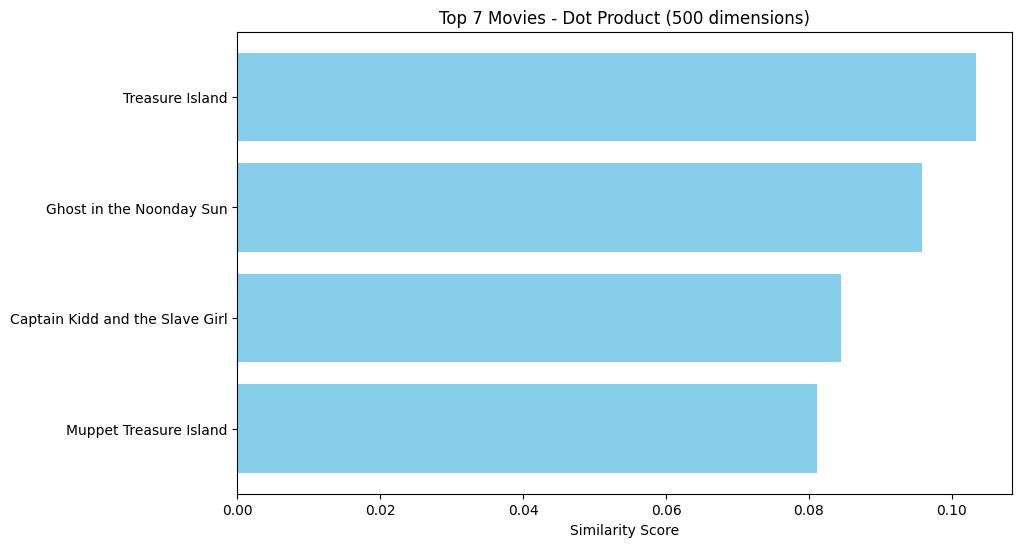

In [ ]:
# Plot for 200 dimensions - Cosine similarity and Dot product
plot_top_similarities(cosine1_sim_200, "Top 7 Movies - Cosine Similarity (200 dimensions)")
plot_top_similarities(dot1_product_200, "Top 7 Movies - Dot Product (200 dimensions)")

# Plot for 500 dimensions - Cosine similarity and Dot product
plot_top_similarities(cosine1_sim_500, "Top 7 Movies - Cosine Similarity (500 dimensions)")
plot_top_similarities(dot1_product_500, "Top 7 Movies - Dot Product (500 dimensions)")

In [7]:
print(f"Top 3 Precision for \"Inspiring Pirate adventure\"")
print(f"Precision Value {3/3}\n")

print(f"Top 5 Precision for \"Inspiring Pirate adventure\"")
print(f"Precision Value {4/5}\n")

print(f"Top 7 Precision for \"Inspiring Pirate adventure\"")
print(f"Precision Value {5/7}\n")

Top 3 Precision for "Inspiring Pirate adventure"
Precision Value 1.0

Top 5 Precision for "Inspiring Pirate adventure"
Precision Value 0.8

Top 7 Precision for "Inspiring Pirate adventure"
Precision Value 0.7142857142857143



In [8]:
print(f"Top 3 Precision for \"Inspiring Pirate adventure\ Cosine 200 Dims\"")
print(f"Precision Value {3/3}\n")

print(f"Top 5 Precision for \"Inspiring Pirate adventure\ Cosine 200 Dims")
print(f"Precision Value {4/5}\n")

print(f"Top 7 Precision for \"Inspiring Pirate adventure\" Cosine 200 Dims")
print(f"Precision Value {5/7}\n")

Top 3 Precision for "Inspiring Pirate adventure\ Cosine 200 Dims"
Precision Value 1.0

Top 5 Precision for "Inspiring Pirate adventure\ Cosine 200 Dims
Precision Value 0.8

Top 7 Precision for "Inspiring Pirate adventure" Cosine 200 Dims
Precision Value 0.7142857142857143



In [9]:
print(f"Top 3 Precision for \"Inspiring Pirate adventure\" Cosine 500 Dims")
print(f"Precision Value {3/3}\n")

print(f"Top 5 Precision for \"Inspiring Pirate adventure\" Cosine 500 Dims")
print(f"Precision Value {4/5}\n")

print(f"Top 7 Precision for \"Inspiring Pirate adventure\" Cosine 500 Dims")
print(f"Precision Value {5/7}\n")

Top 3 Precision for "Inspiring Pirate adventure" Cosine 500 Dims
Precision Value 1.0

Top 5 Precision for "Inspiring Pirate adventure" Cosine 500 Dims
Precision Value 0.8

Top 7 Precision for "Inspiring Pirate adventure" Cosine 500 Dims
Precision Value 0.7142857142857143



In [10]:
print(f"Top 3 Precision for \"Inspiring Pirate adventure\" Dot 500 Dims")
print(f"Precision Value {3/3}\n")

print(f"Top 5 Precision for \"Inspiring Pirate adventure\" Dot 500 Dims")
print(f"Precision Value {4/5}\n")

print(f"Top 7 Precision for \"Inspiring Pirate adventure\" Dot 500 Dims")
print(f"Precision Value {5/7}\n")

Top 3 Precision for "Inspiring Pirate adventure" Dot 500 Dims
Precision Value 1.0

Top 5 Precision for "Inspiring Pirate adventure" Dot 500 Dims
Precision Value 0.8

Top 7 Precision for "Inspiring Pirate adventure" Dot 500 Dims
Precision Value 0.7142857142857143



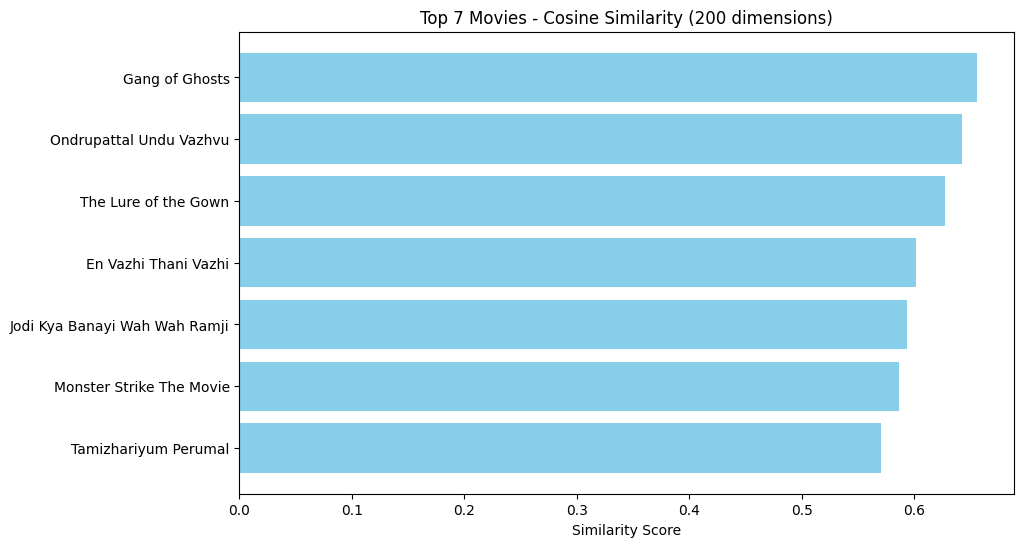

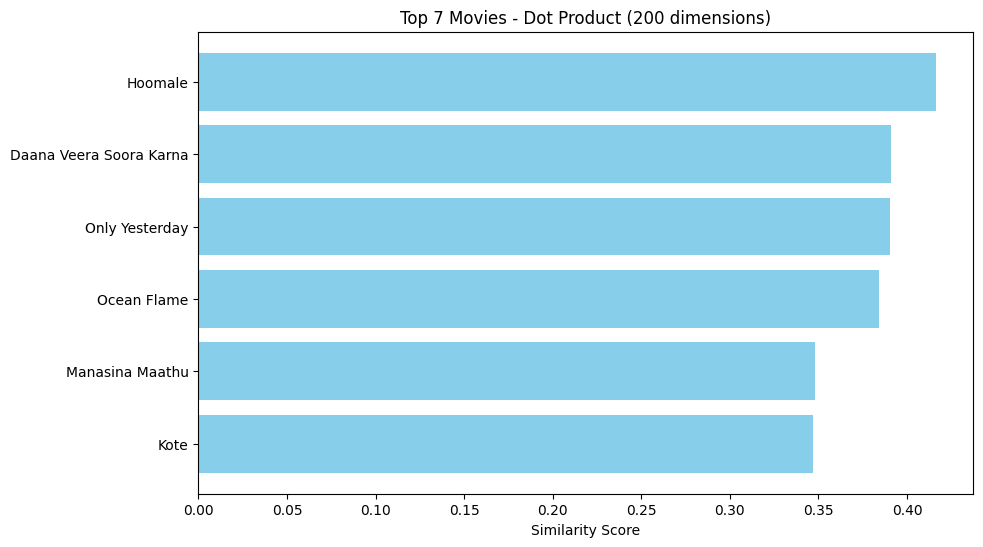

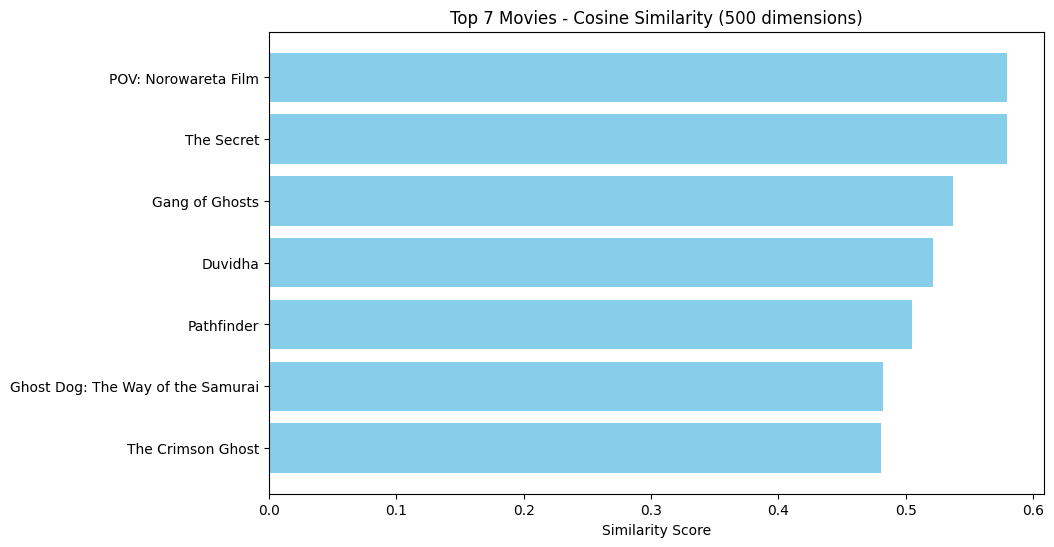

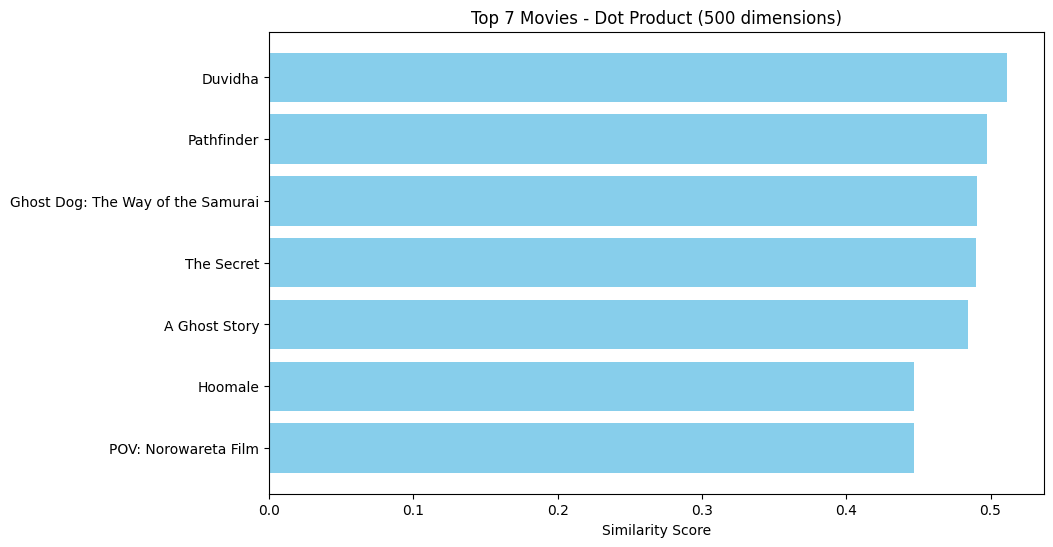

In [ ]:
# Plot for 200 dimensions - Cosine similarity and Dot product
plot_top_similarities(cosine2_sim_200, "Top 7 Movies - Cosine Similarity (200 dimensions)")
plot_top_similarities(dot2_product_200, "Top 7 Movies - Dot Product (200 dimensions)")

# Plot for 500 dimensions - Cosine similarity and Dot product
plot_top_similarities(cosine2_sim_500, "Top 7 Movies - Cosine Similarity (500 dimensions)")
plot_top_similarities(dot2_product_500, "Top 7 Movies - Dot Product (500 dimensions)")

In [1]:
print(f"TSimilarity for \"depressing ghost story\" Cosine 200 Dims")
print(f"Precision Value {0/7}\n")

TSimilarity for "depressing ghost story" Cosine 200 Dims
Precision Value 0.0



In [11]:
print(f"TSimilarity for \"depressing ghost story\" Dot 200 Dims")
print(f"Precision Value {0/6}\n")

TSimilarity for "depressing ghost story" Dot 200 Dims
Precision Value 0.0



In [12]:
print(f"Similarity for \"depressing ghost story\" Cosine 500 Dims")
print(f"Precision Value {3/7}\n")

Similarity for "depressing ghost story" Cosine 500 Dims
Precision Value 0.42857142857142855



In [13]:
print(f"Similarity for \"depressing ghost story\" Dot 500 Dims")
print(f"Precision Value {4/7}\n")

Similarity for "depressing ghost story" Dot 500 Dims
Precision Value 0.5714285714285714



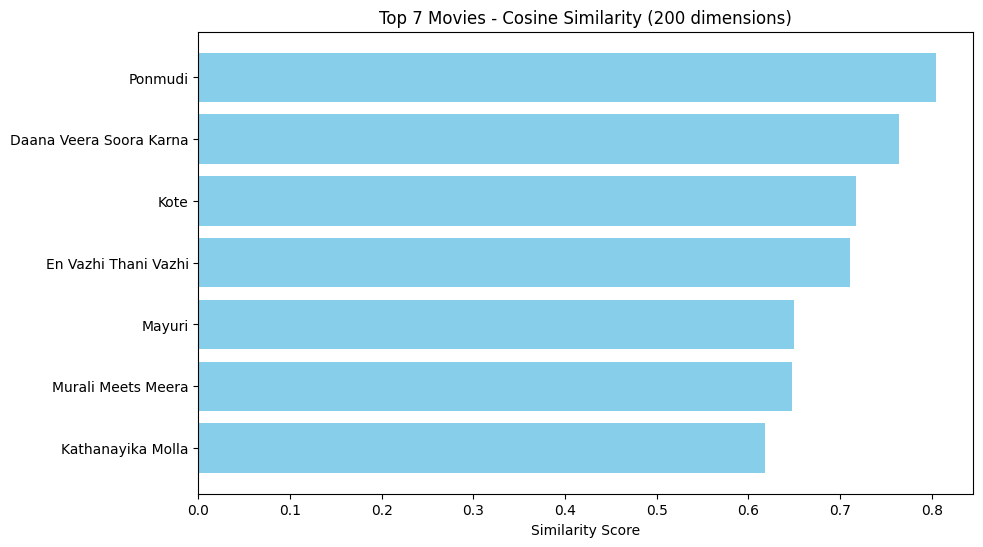

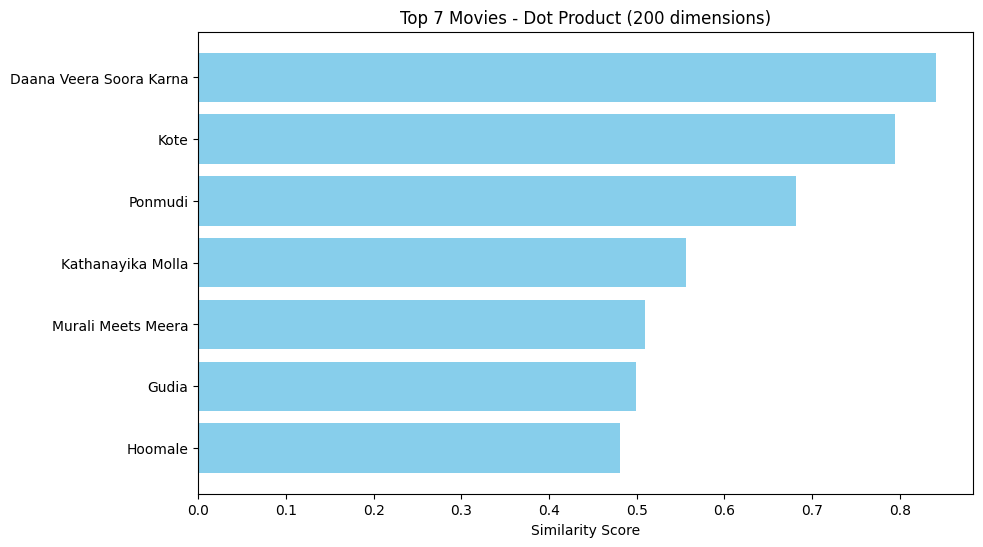

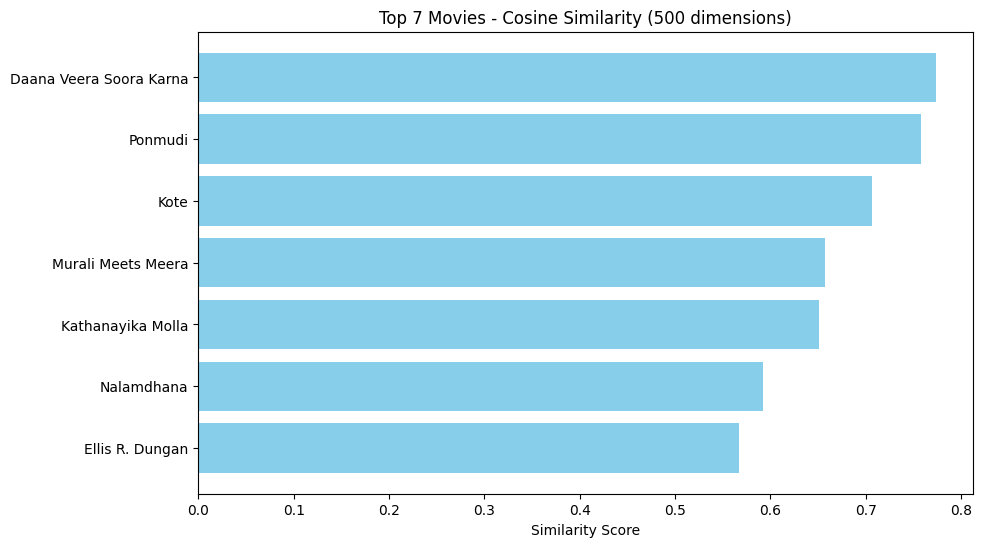

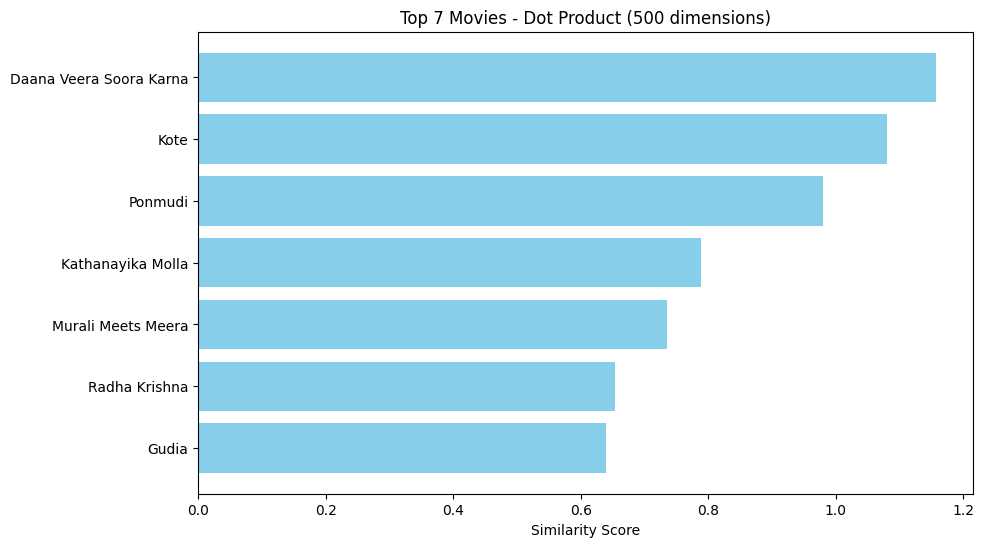

In [ ]:
# Plot for 200 dimensions - Cosine similarity and Dot product
plot_top_similarities(cosine3_sim_200, "Top 7 Movies - Cosine Similarity (200 dimensions)")
plot_top_similarities(dot3_product_200, "Top 7 Movies - Dot Product (200 dimensions)")

# Plot for 500 dimensions - Cosine similarity and Dot product
plot_top_similarities(cosine3_sim_500, "Top 7 Movies - Cosine Similarity (500 dimensions)")
plot_top_similarities(dot3_product_500, "Top 7 Movies - Dot Product (500 dimensions)")

In [14]:
print(f"Top 3 Similarity for \"Based on a true story\" Cosine 200 Dims")
print(f"Precision Value {2/3}\n")

print(f"Top 5 Similarity for \"Based on a true story\" Cosine 200 Dims")
print(f"Precision Value {3/5}\n")

print(f"Top 7 Similarity for \"Based on a true story\" Cosine 200 Dims")
print(f"Precision Value {5/7}\n")

Top 3 Similarity for "Based on a true story" Cosine 200 Dims
Precision Value 0.6666666666666666

Top 5 Similarity for "Based on a true story" Cosine 200 Dims
Precision Value 0.6

Top 7 Similarity for "Based on a true story" Cosine 200 Dims
Precision Value 0.7142857142857143



In [15]:
print(f"Top 3 Similarity for \"Based on a true story\" Dot 200 Dims")
print(f"Precision Value {2/3}\n")

print(f"Top 5 Similarity for \"Based on a true story\" Dot 200 Dims")
print(f"Precision Value {4/5}\n")

print(f"Top 7 Similarity for \"Based on a true story\" Dot 200 Dims")
print(f"Precision Value {5/7}\n")

Top 3 Similarity for "Based on a true story" Dot 200 Dims
Precision Value 0.6666666666666666

Top 5 Similarity for "Based on a true story" Dot 200 Dims
Precision Value 0.8

Top 7 Similarity for "Based on a true story" Dot 200 Dims
Precision Value 0.7142857142857143



In [16]:
print(f"Top 3 Similarity for \"Based on a true story\"Cosine 500 Dims")
print(f"Precision Value {2/3}\n")

print(f"Top 5 Similarity for \"Based on a true story\" Cosine 500 Dims")
print(f"Precision Value {3/5}\n")

print(f"Top 7 Similarity for \"Based on a true story\" Cosine 500 Dims")
print(f"Precision Value {5/7}\n")

Top 3 Similarity for "Based on a true story"Cosine 500 Dims
Precision Value 0.6666666666666666

Top 5 Similarity for "Based on a true story" Cosine 500 Dims
Precision Value 0.6

Top 7 Similarity for "Based on a true story" Cosine 500 Dims
Precision Value 0.7142857142857143



In [17]:
print(f"Top 3 Similarity for \"Based on a true story\" Dot 500 Dims")
print(f"Precision Value {1/3}\n")

print(f"Top 5 Similarity for \"Based on a true story\" Dot 500 Dims")
print(f"Precision Value {3/5}\n")

print(f"Top 7 Similarity for \"Based on a true story\" Dot 500 Dims")
print(f"Precision Value {4/7}\n")

Top 3 Similarity for "Based on a true story" Dot 500 Dims
Precision Value 0.3333333333333333

Top 5 Similarity for "Based on a true story" Dot 500 Dims
Precision Value 0.6

Top 7 Similarity for "Based on a true story" Dot 500 Dims
Precision Value 0.5714285714285714

